¡ Hola Sebastian! Como te va?



 Mi nombre es Facundo Lozano! Ya he tenido el agrado de revisar otros proyectos tuyos, nuevamente seré tu revisor en este proyecto.



Como siempre, a continuación un poco sobre la modalidad de revisión que usaremos:



 Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.



 Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.



 Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:



 <div class="alert alert-block alert-success">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Exito. Todo se ha hecho de forma exitosa.

 </div>



 <div class="alert alert-block alert-warning">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Observación. Algunas recomendaciones.

 </div>



 <div class="alert alert-block alert-danger">



 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos.

 </div>



 Puedes responder utilizando esto:



 <div class="alert alert-block alert-info">

 <b>Respuesta de estudiante.</b> <a class="tocSkip"></a>

 </div>

# Visión Artificial ML - Predictor de edad para Supermercado 

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Sebastian, como siempre, me tomo este tiempo al inicio del proyecto para comentar mis apreciaciones generales de esta primera iteración de la entrega. 

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente siempre me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran cientifico de datos."
    
Ahora si yendo a esta notebook. Sebastian, lo he dicho al final del proyecto pero lo resalto aquí nuevamente, tu proyecto está muy bien resuelto, resalta capacidad y comprensión de todas las herramientas, como a la vez esta ordenado y es sencillo de seguir, felictiaciones!

Este proyecto está en condiciones de ser aprobado! Éxitos dentro de tu camino en el mundo de los datos!

Saludos Sebastian!

<h1>Contenido:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inicialización</a></span></li><li><span><a href="#Carga-los-datos" data-toc-modified-id="Carga-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga los datos</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Modelado" data-toc-modified-id="Modelado-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelado</a></span></li><li><span><a href="#Prepara-el-script-para-ejecutarlo-en-la-plataforma-GPU" data-toc-modified-id="Prepara-el-script-para-ejecutarlo-en-la-plataforma-GPU-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prepara el script para ejecutarlo en la plataforma GPU</a></span><ul class="toc-item"><li><span><a href="#El-resultado" data-toc-modified-id="El-resultado-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>El resultado</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

## Inicialización

In [1]:
import pandas as pd
import numpy as np
from PIL import Image as PImage
import matplotlib.pyplot as plt
import seaborn as sb

#importo tensorflow y keras para crear la red neuronal
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
# cargo el archivo de etiquetas de imagenes
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


## EDA

In [4]:
#verifico valores ausentes
labels.isna().sum()

file_name    0
real_age     0
dtype: int64

In [5]:
#verifico valores duplicados
labels.duplicated().sum()

0

In [6]:
#uso describe para analizar los datos
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Hasta aquí excelente Sebastian, una importación de librerías perfecta por separado de la carga de los datos y a la vez excelente implementación de métodos para observar la composición de los dato! Bien hecho!

Text(0.5, 0, 'Edad')

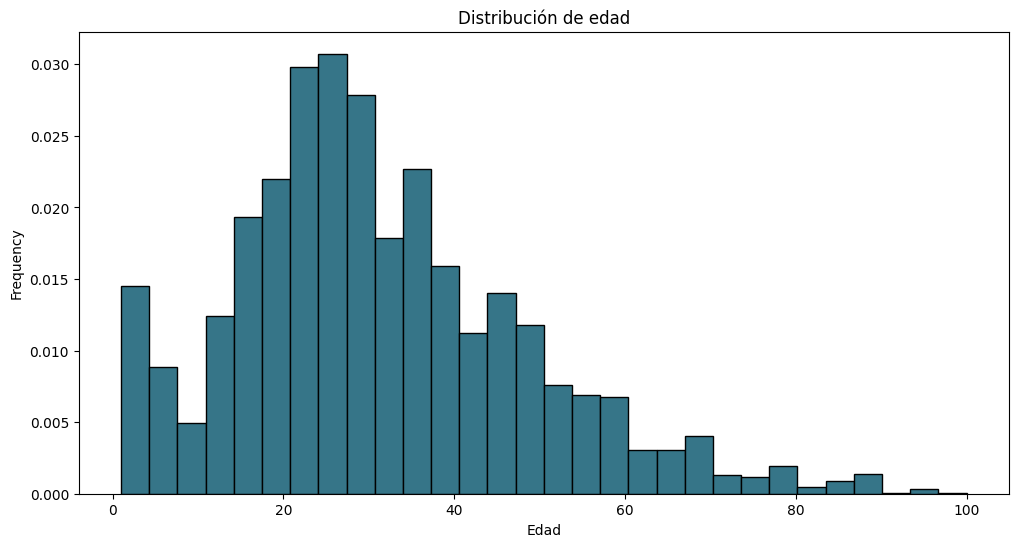

In [7]:
#creo un histograma para anlizar la distribución
labels['real_age'].plot(kind='hist',
                        figsize = (12,6),
                        bins=30, 
                        density=True, 
                        color = '#367588', 
                        edgecolor = 'black',
                        title = 'Distribución de edad')
plt.xlabel('Edad')

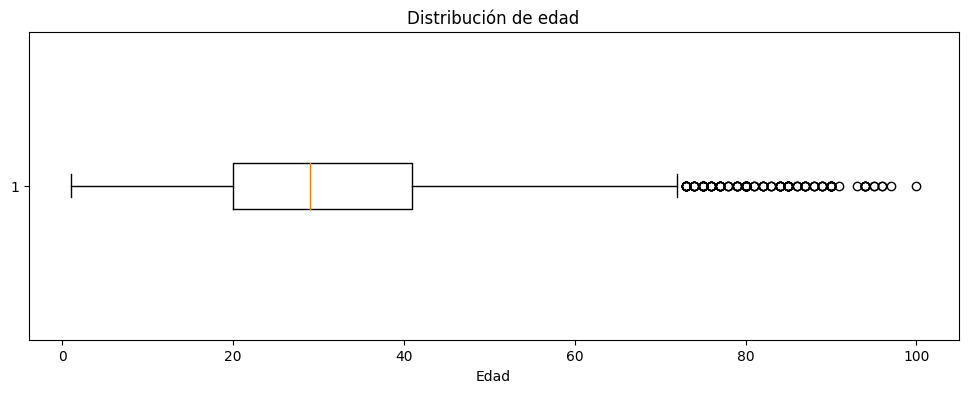

In [8]:
#crear grafica de caja y bigotes
fig, ax = plt.subplots(figsize = (12,4))
ax.boxplot(labels['real_age'], vert=False)

# agrego titulo y eje x
ax.set_xlabel('Edad')
ax.set_title('Distribución de edad')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Bien hecho Sebastian! Tal como debiamos hemos profundizado sobre la distribución de las edades de nuestros datos, excelente implementación tanto del histograma como del boxplot!

**Observación General:**

El conjunto de datos de imágenes tiene 2 columnas, `file_name` y	`real_age`. La primera contiene el nombre de la imagen dentro de la carpeta `/datasets/faces/` la cual contiene 7591 fotos de personas y serán usadas como las características de predicción. Complementariamente la columna `real_age` contiene la información de la edad real de cada persona, esta será nuestro objetivo de predicción para el modelo de red neuronal.


- la tabla contiene 7591 referencias a imágenes.
- la mayoría de las imágenes son de personas entre 20 y 40 años.
- a medida que la edad aumenta existen menos imágenes de muestra.
- el promedio de edad es de 31 años.
- la desviación estándar de la calificación promedio es 17 años.

Limpieza y procesamiento de datos:

- No existen valores ausentes en los datos.
- No existen valores duplicados en los datos.

**imágenes de ejemplo sin usar ImageDataGenerator:**

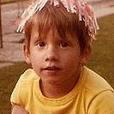

In [9]:
PImage.open('/datasets/faces/final_files/000000.jpg')

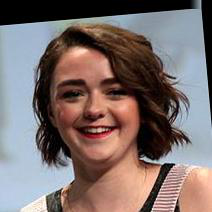

In [10]:
#GOT
PImage.open('/datasets/faces/final_files/000004.jpg')

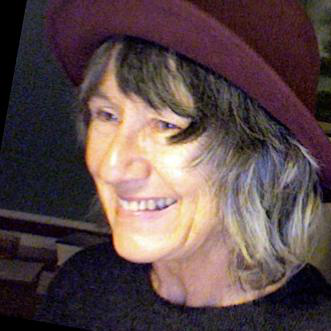

In [11]:
PImage.open('/datasets/faces/final_files/000054.jpg')

In [12]:
#creo datagen con imagedatagenerator y uso resacale 
datagen = ImageDataGenerator(rescale = 1/255)

#creo datagen flow para cargar las imagenes de forma eficiente
datagen_flow = datagen.flow_from_dataframe(dataframe=labels,
        directory='/datasets/faces/final_files/',               #defino la ruta de las imagenes
        x_col ='file_name',                                     #defino el nombre de la imagen
        y_col ='real_age',                                      #nombre de la columna con la edad
        target_size=(224, 224),                                 #defino el mismo tamaño de output 
        batch_size=32,
        class_mode='raw',
        seed=300)

Found 7591 validated image filenames.


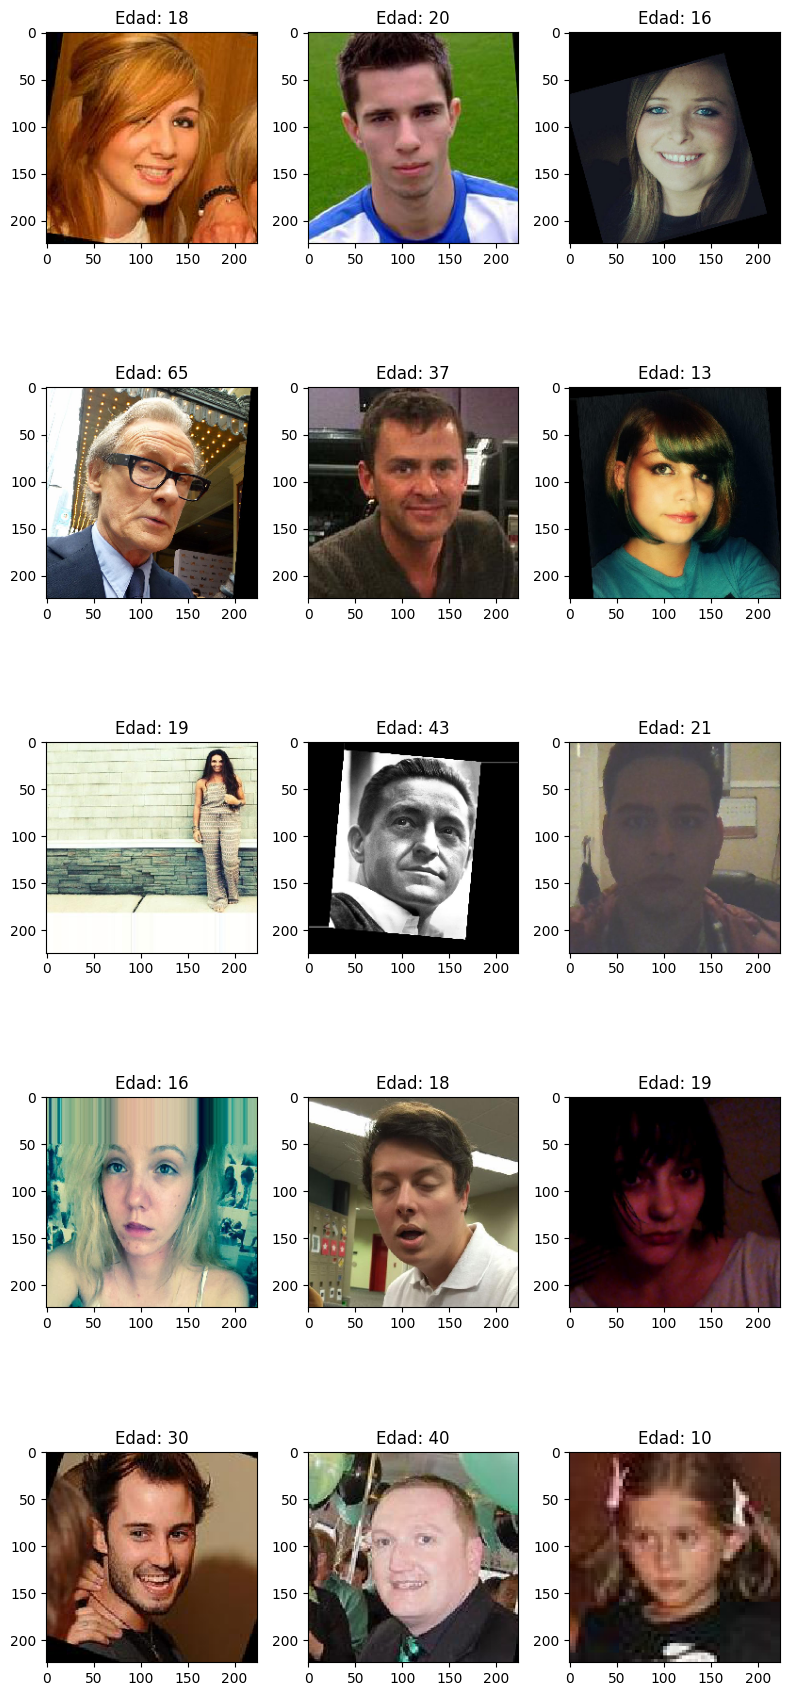

In [13]:
#creo una funcion para mostrar imágenes de ejemplo

def show_img(batch, predictions=None):
    
    fig = plt.figure(figsize=(8, 18))
    
    # creo bucle for para iterar en cada elemento y mostrar la imagen
    for i in range(15):
        fig.add_subplot(5, 3, i+1)
        plt.imshow(batch[0][i])
        age = batch[1][i]
        
        #añado la edad real de cada persona a al resultado plot
        if predictions is not None:
            age = f'gt: {age}, pred: {round(predictions[i])}'
        plt.title(f'Edad: {age}')
        

    fig.tight_layout()

#ejecuto la función con datagen    
show_img(next(datagen_flow))

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente implementación de código para la visualización de las imagenes con las que trabajaremos, sigamos!

**Las imágenes iniciales se procesaron con el uso de Keras: ImageDataGenerator**, de esta forma se **estandarizó la escala (244x244)** de cada una de ellas, también dados su procesos de normalización se modificó la orientación y aumentaron los datos para que el modelo pueda funcionar mejor ya que tendrá datos procesados para el análisis vs los iniciales.

**Observaciones de las fotografías**

- Podemos notar que **hay imágenes donde las personas están de perfil.**
- **Existen imágenes donde la cara esta parcialmente tapada** por las manos o esta distante (foto cuerpo completo).
- **También existen imágenes donde la foto tiene poca luz o contraste** con el fondo.
- Existen imágenes tanto a color como en blanco y negro en los datos.

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [14]:
#creo la funcion para los datos de entrenamiento
#uso ImageDataGenerator para crear los datos de entrenmiaento
#uso rescale para normalizar los datos y horizontal flip para mejorar el aprendizaje del modelo

def load_train(path):
    data = pd.read_csv('/datasets/faces/labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25,rescale=1/255,horizontal_flip=True)
    train_data = train_datagen.flow_from_dataframe(dataframe=data,
                                             directory='/datasets/faces/final_files/',
                                             x_col ='file_name', 
                                             y_col ='real_age',
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='raw',
                                             subset='training',
                                             seed=300)
    return train_data

In [15]:
#creo la funcion para los datos de prueba
#uso ImageDataGenerator para crear los datos de prueba
#uso rescale para normalizar los datos y no uso horizontal_flip


def load_test(path):
    data_test = pd.read_csv('/datasets/faces/labels.csv')
    test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.25)
    test_data = test_datagen.flow_from_dataframe(dataframe=data_test,
                                            directory='/datasets/faces/final_files/',
                                            x_col ='file_name', 
                                            y_col ='real_age',        
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='raw',
                                            subset='validation',
                                            seed=300)
    return test_data

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy buen armadas las funciones Sebastian, aquí podríamos probar diferentes valores del lote para observar si hay mejoras de eficiencia en los modelos, pero por otro lado excelente al mantenter los tamaños de entrada iguales. Sigamos!

In [16]:
# defino la funcion para el modelo ResNet50

def create_model(input_shape):
    model = Sequential()
    
    #agrego ResNet50 con imagenet, AveragePooling y capa con función de activaion Relu
    model.add(ResNet50(input_shape=input_shape, weights='imagenet', include_top=False))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    
    # agrego optimizador adam y el compilador con la función de perdida MAE
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer,
                  loss='mse', metrics=['mae']
                  )

    return model

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente creación de modelo Sebastian, en primera instancia implementando el modelo sugerido Resnet50, y luego creando la estructura del modelo aplicando tanto capas como el optimizador y compilando. Una forma de visualizar mejoras en los modelos es probando diferentes tasas de aprendizaje o la agregación de mayor cantidad de capas.

In [17]:
# creo la funcion para entrenar el modelo
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

#creo entrenamiento del modelo con el resultado de las funciones anteriores y defino 10 épocas 
    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=10,
        verbose=2,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps
    )

    return model

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Un armado perfecto Sebastian, bien hecho! Aquí podríamos agregar al inicio la línea **%%time** para observar el tiempo que demora esta ejecución.

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [18]:
#script.py usado en la GPU

import pandas as pd

#importo tensorflow
import tensorflow as tf

#importo keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

#creo la funcion para los datos de entrenamiento
def load_train(path):
    data = pd.read_csv('/datasets/faces/labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25,rescale=1/255,horizontal_flip=True)
    train_data = train_datagen.flow_from_dataframe(dataframe=data,
                                             directory='/datasets/faces/final_files/',
                                             x_col ='file_name', 
                                             y_col ='real_age',
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='raw',
                                             subset='training',
                                             seed=300)
    return train_data

#creo la funcion para los datos de prueba
def load_test(path):
    data_test = pd.read_csv('/datasets/faces/labels.csv')
    test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.25)
    test_data = test_datagen.flow_from_dataframe(dataframe=data_test,
                                            directory='/datasets/faces/final_files/',
                                            x_col ='file_name', 
                                            y_col ='real_age',        
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='raw',
                                            subset='validation',
                                            seed=300)
    return test_data


# defino la funcion para el modelo ResNet50
def create_model(input_shape):
    
    model = Sequential()
    
    #agrego ResNet50 con imagenet, averagepooling y capas con funcion de activaion Relu
    model.add(ResNet50(input_shape=input_shape, weights='imagenet', include_top=False))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    
    # agrego optimizador adam y el compilador con la funcion de perdida MAE
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer,
                  loss='mse', metrics=['mae']
                  )

    return model

# creo la funcion para entrenar el modelo y defino 10 epocas 
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=10,
        verbose=2,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps
    )

    return model

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

2024-06-17 16:38:35.317285: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2024-06-17 16:38:35.396146: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.

Found 5694 validated image filenames.

Found 1897 validated image filenames.

2024-06-17 16:38:39.497493: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-06-17 16:38:39.593555: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-17 16:38:39.593753: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2024-06-17 16:38:39.593788: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-06-17 16:38:39.593821: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-06-17 16:38:39.665752: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2024-06-17 16:38:39.680171: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2024-06-17 16:38:39.785418: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2024-06-17 16:38:39.794717: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2024-06-17 16:38:39.794774: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2024-06-17 16:38:39.794890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-17 16:38:39.795172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-17 16:38:39.795335: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2024-06-17 16:38:39.795760: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-06-17 16:38:39.817078: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300020000 Hz
2024-06-17 16:38:39.818952: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4d00730 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-06-17 16:38:39.819008: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-06-17 16:38:39.999703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-17 16:38:40.000001: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4612fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-17 16:38:40.000022: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2024-06-17 16:38:40.000258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-17 16:38:40.000457: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2024-06-17 16:38:40.000506: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-06-17 16:38:40.000520: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-06-17 16:38:40.000550: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2024-06-17 16:38:40.000577: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2024-06-17 16:38:40.000604: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2024-06-17 16:38:40.000627: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2024-06-17 16:38:40.000639: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2024-06-17 16:38:40.000708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-17 16:38:40.000927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-17 16:38:40.001079: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2024-06-17 16:38:40.002109: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-06-17 16:38:41.369333: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-06-17 16:38:41.369380: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2024-06-17 16:38:41.369391: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2024-06-17 16:38:41.370729: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-17 16:38:41.370978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-17 16:38:41.371150: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-06-17 16:38:41.371181: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14988 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 1s
12107776/94765736 [==>...........................] - ETA: 0s
25157632/94765736 [======>.......................] - ETA: 0s
37666816/94765736 [==========>...................] - ETA: 0s
50126848/94765736 [==============>...............] - ETA: 0s
62644224/94765736 [==================>...........] - ETA: 0s
75145216/94765736 [======================>.......] - ETA: 0s
87662592/94765736 [==========================>...] - ETA: 0s
94773248/94765736 [==============================] - 0s 0us/step
_______________________________________________________________________________________________________________________________

Train for 178 steps, validate for 60 steps

Epoch 1/10

2024-06-17 16:38:57.435396: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library 
libcublas.so.10
2024-06-17 16:38:58.562870: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library 
libcudnn.so.7

178/178 - 67s - loss: 219.7039 - mae: 10.9753 - val_loss: 416.7536 - val_mae: 15.3160

Epoch 2/10
178/178 - 38s - loss: 115.6320 - mae: 8.1880 - val_loss: 283.5257 - val_mae: 12.9987

Epoch 3/10
178/178 - 38s - loss: 87.0683 - mae: 7.1582 - val_loss: 485.0548 - val_mae: 16.8237

Epoch 4/10
178/178 - 38s - loss: 77.4012 - mae: 6.6814 - val_loss: 221.8699 - val_mae: 10.7641

Epoch 5/10
178/178 - 38s - loss: 62.8946 - mae: 6.0352 - val_loss: 139.0154 - val_mae: 8.4173

Epoch 6/10
178/178 - 38s - loss: 49.1287 - mae: 5.3357 - val_loss: 85.1387 - val_mae: 6.9466

Epoch 7/10
178/178 - 38s - loss: 40.6013 - mae: 4.8486 - val_loss: 84.3583 - val_mae: 6.8865

Epoch 8/10
178/178 - 38s - loss: 36.1207 - mae: 4.6040 - val_loss: 172.8330 - val_mae: 9.6537

Epoch 9/10
178/178 - 38s - loss: 34.2551 - mae: 4.4680 - val_loss: 90.7888 - val_mae: 7.1894

Epoch 10/10
178/178 - 38s - loss: 27.4807 - mae: 4.0593 - val_loss: 78.3177 - val_mae: 6.5081

**60/60 - 9s - loss: 78.3177 - mae: 6.5081**

**Test MAE: 6.5081**

<div class="alert alert-block alert-success">
<b>Comentario del revisocr. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente conclusión Sebastian, destaco el rendimiento exitoso del modelo y sobre todo el procedimiento aplicado. El modelo cumple con los criterios establecidos y tus conclusiones demuestran tu comprensión de lo aplicado y obtenido. Felicitaciones!

**Observaciones:**

Nota de la descripción: 'el valor EAM más bajo alcanzado es 5.4. Si obtienes un EAM inferior a 7, ¡este sería un gran resultado!'

**El modelo tiene un EAM de 6.5** años lo cual cumple con el requerimiento de menor a 8 años e indica un buen rendimiento.

**El script para la plataforma GPU contiene las siguientes funciones y parámetros:**

1) **load_train(path):** se utilizó ImageDatagenerator con los parámetros (validation_split=0.25, rescale=1/255, horizontal_flip=True)


2) **load_test(path):** se utilizó ImageDataGenerator(rescale=1/255,  validation_split=0.25)


3) **Create_model(input_shape):**

    - Se definió el modelo ResNet50 con los pesos  de 'imagenet' (librería)
    - Se utilizó una capa de GlobalAveragePooling2D()
    - Se agregó una capa con funcion de activación Relu
    - Se definió el optimizador adam con una taza de aprendizaje de 0.0005 y la métrica = EAM


4) **train_model(model, train_data, test_data, batch_size, epochs, steps_per_epoch, validation_steps)**: para controlar el entrenamiento del modelo se definieron 10 épocas para model.fit()

Podemos explicar este rendimiento ya que **ResNET50 es destacado por su efectividad en tareas de visión computacional, este permite el uso de bloques residuales para realizar saltos en algunas capas mejorando la efectividad de entrenamiento y exactitud en la predicción,** y asi optimizando nuestro modelo de verificación de edad.


## Conclusiones

**¿Puede la visión artificial ayudar al cliente en este caso?**

**No es recomendable para la compañía depender solo del modelo ya que el error aun es de 6.5 años**, esto quiere decir que pueden existir casos donde el modelo permita vender alcohol a menores de edad y ocasionar problemas a la compañía como multas y sanciones.

Sin embargo, se puede recomendar un enfoque mixto donde para las personas que sean mayores de 26 años (asumiendo 18 años como la mayoría de edad) no exista una verificación adicional. por otro lado, para los que estén en el rango de 18 a 25 se debe pedir la identificación en el momento de la compra. Para la compañía sería una mejora en tiempos ya que la mayoría de sus clientes están dentro de los 20 a 40 años. 

**¿Qué otras tareas prácticas podrían resolver el cliente con el modelo? Comparte tus ideas al respecto.**

 **La compañía ahora cuenta con una herramienta que le permite analizar mejor a sus clientes y mejorar el conocimiento del negocio, ahora puede definir nuevas estrategias basadas en grupos de edad, como los productos más comprados, ingresos y segmentación**, esto permite definir tácticas como crear campañas especializadas a sus grupos más rentables, y aprovechar oportunidades de negocio nuevas, por lo cual puede sacar provecho de su uso con descuentos, cupones, campañas de promociones y mercadeo especializado para incrementar los beneficios con la ayuda del modelo.



<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>
    
Sebastian, nuevamente quiero felicitarte, tanto tus conclusiones como el procedimiento en general ha sido perfecto. Destaco el gran compromiso demostrado a lo largo del proyecto!

# Lista de control

- [X]  El Notebook estaba abierto 
- [X]  El código no tiene errores
- [X]  Las celdas con el código han sido colocadas en el orden de ejecución
- [X]  Se realizó el análisis exploratorio de datos 
- [X]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [X]  El valor EAM del modelo no es superior a 8 
- [X]  El código de entrenamiento del modelo se copió en el notebook final 
- [X]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [X] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo